In [7]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

In [8]:
# Function to load and resize images from a directory
def load_images_from_folder(folder, target_size=(256, 256)):
    images = []
    labels = []
    for i, category in enumerate(os.listdir(folder)):
        category_path = os.path.join(folder, category)
        for filename in os.listdir(category_path):
            img_path = os.path.join(category_path, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, target_size)
                images.append(img)
                labels.append(i)
    return np.array(images), np.array(labels)

In [9]:
# Load images from the dataset
dataset_path = 'UCMerced_LandUse/Images'
X, y = load_images_from_folder(dataset_path)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

Epoch 1/10
53/53 [==============================] - 49s 911ms/step - loss: 4.3954 - accuracy: 0.0714 - val_loss: 2.8787 - val_accuracy: 0.1333
Epoch 2/10
53/53 [==============================] - 48s 913ms/step - loss: 2.6757 - accuracy: 0.1899 - val_loss: 2.6620 - val_accuracy: 0.2119
Epoch 3/10
53/53 [==============================] - 48s 901ms/step - loss: 1.8540 - accuracy: 0.4518 - val_loss: 2.2913 - val_accuracy: 0.3619
Epoch 4/10
53/53 [==============================] - 48s 913ms/step - loss: 0.8652 - accuracy: 0.7601 - val_loss: 2.2511 - val_accuracy: 0.3905
Epoch 5/10
53/53 [==============================] - 48s 903ms/step - loss: 0.4095 - accuracy: 0.8857 - val_loss: 2.5446 - val_accuracy: 0.4214
Epoch 6/10
53/53 [==============================] - 48s 909ms/step - loss: 0.2262 - accuracy: 0.9464 - val_loss: 3.0043 - val_accuracy: 0.4190
Epoch 7/10
53/53 [==============================] - 48s 906ms/step - loss: 0.1042 - accuracy: 0.9696 - val_loss: 3.0978 - val_accuracy: 0.4429

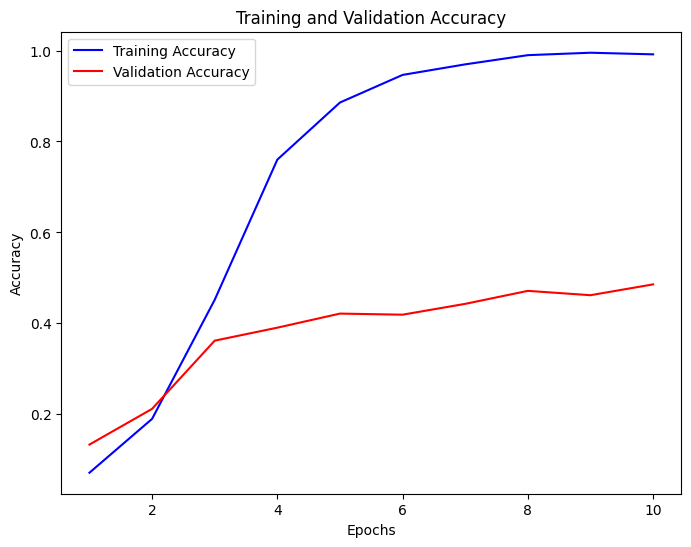

In [13]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(os.listdir(dataset_path)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Get training and validation accuracy values from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Create an array of epochs
epochs = np.arange(1, len(training_accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

14/14 [==============================] - 2s 147ms/step - loss: 3.2631 - accuracy: 0.4857
Test accuracy: 0.48571428656578064
